<b>ML3.1 Диагностика и кривые обучения<br>
Деменчук Георгий</b>

Импортируем необходимые библиотеки

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

1.	Загрузите датасет breast_cancer.

In [29]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [30]:
X.shape

(569, 30)

In [31]:
y.shape

(569,)

2.	Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [32]:
X_2d = X[:, :2]
X_2d.shape

(569, 2)

In [33]:
y.shape

(569,)

3.	Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=0)

4.	Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [39]:
clf = SVC(C=0.01)
clf.fit(X_train, y_train)

print(f"Score (train): {clf.score(X_train, y_train)}")
print(f"Score (test): {clf.score(X_test, y_test)}")

Score (train): 0.6923076923076923
Score (test): 0.6666666666666666


5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
<br>
<br>
a.	собрать больше объектов наблюдения<br>
b.	провести обучение на меньшем объеме данных<br>
c.	исключить часть признаков из модели<br>
d.	добавить новые признаки в модель<br>
e.	добавить полиномиальные признаки<br>
f.	попробовать более сложные модели<br>
g.	попробовать более простые модели<br>
h.	увеличить регуляризацию модели<br>
i.	уменьшить регуляризацию модели<br>

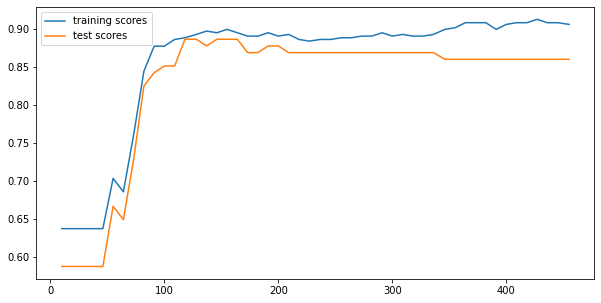

In [65]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(10, len(X_train)):
    
    clf = SVC(C=0.1, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

6.	Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [55]:
clf = SVC(C=10)
clf.fit(X_train, y_train)

print(f"Score (train): {clf.score(X_train, y_train)}")
print(f"Score (test): {clf.score(X_test, y_test)}")

Score (train): 0.9098901098901099
Score (test): 0.8771929824561403


7.	Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

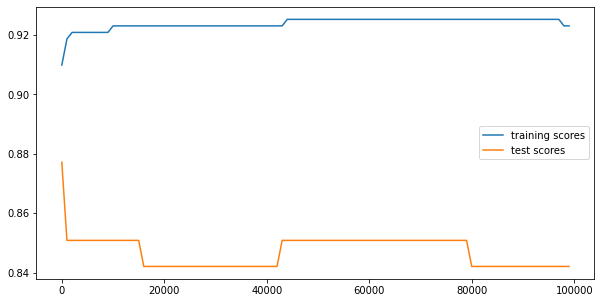

In [62]:
training_scores = []
test_scores = []
numbers = []

for i in range(1, 100000, 1000):
    clf = SVC(C=i)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    numbers.append(i)

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

8.	Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

9.	Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

10.	Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

In [ ]:
#####